In [2]:
import pandas as pd
# Load the chat data into a Python environment
with open('WhatsApp Chat.txt', 'r', encoding='utf-8') as file:
    chat_lines = file.readlines()

# Remove the unnecessary first line
chat_lines = chat_lines[1:]

# Splitting the chat lines into timestamp, sender, and message
chat_data = []
for line in chat_lines:
    parts = line.split(' - ')
    timestamp = parts[0]
    sender_message = ' - '.join(parts[1:])

    # Check if the line contains the delimiter ": "
    if ': ' in sender_message:
        sender, message = sender_message.split(': ', 1)
        chat_data.append({'Timestamp': timestamp, 'Sender': sender, 'Message': message})
    else:
        # If no delimiter found, consider the sender as None and the whole line as message
        chat_data.append({'Timestamp': timestamp, 'Sender': None, 'Message': sender_message})

# Convert to DataFrame
chat_df = pd.DataFrame(chat_data)


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Define preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    processed_text = ' '.join(filtered_tokens)
    return processed_text

# Apply preprocessing function to chat data
chat_df['Processed_Message'] = chat_df['Message'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


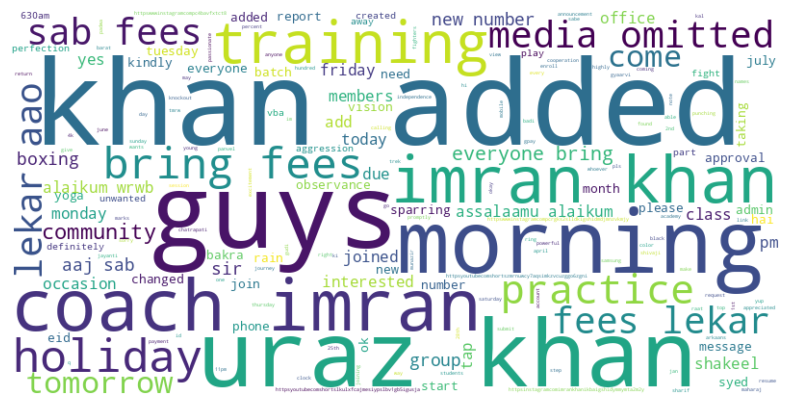

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all messages into a single string
all_messages = ' '.join(chat_df['Processed_Message'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [5]:
# Save word cloud image
wordcloud.to_file('wordcloud.png')


In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [7]:
sia = SentimentIntensityAnalyzer()
# Analyze sentiment of messages in chat data

In [8]:
def analyze_sentiment(message):
    # Use VADER SentimentIntensityAnalyzer to get the sentiment score
    sentiment_score = sia.polarity_scores(message)
    # Determine sentiment based on the compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [9]:
chat_df['Sentiment'] = chat_df['Message'].apply(analyze_sentiment)


In [10]:
print(chat_df[['Timestamp', 'Sender', 'Message', 'Sentiment']])

                                             Timestamp           Sender  \
0                                       6/25/21, 15:40             None   
1                                        3/1/23, 01:04             None   
2                                        3/1/23, 12:13  +91 91525 14334   
3                                                  .\n             None   
4                                                  .\n             None   
..                                                 ...              ...   
187                                                 \n             None   
188  👆🏻Introducing our new batches for ramzan month...             None   
189                                                 \n             None   
190                                                 \n             None   
191  Please note there is no change in morning batc...             None   

                                               Message Sentiment  
0    +91 77382 00492 created gro

In [11]:
chat_df.to_csv('whatsapp_chat_with_sentiment.csv', index=False)


In [12]:
chat_df = pd.read_csv('whatsapp_chat_with_sentiment.csv')


In [14]:
print(chat_df['Timestamp'].unique())

['6/25/21, 15:40' '3/1/23, 01:04' '3/1/23, 12:13' '.\n' '\n'
 ' #boxing #mma #fitness #kickboxing #muaythai #ufc #workout #motivation #boxingclubs #training #gym #wrestling #jiujitsu #fight #fighter #boxerworld #martialarts #fit #boxingtraining #fitnessmotivation #champion #judo #cardio #knockout #sport #health #usa #vba #fighting\n'
 'https://www.instagram.com/reel/CpPIx0stiF0/?igshid=MDJmNzVkMjY=\n'
 '3/10/23, 21:51' 'Join boxing today @vision_boxing_academy.\n'
 'Choose from various batches catering to all individuals.\n'
 'DM for more details.\n'
 '#boxing #boxingworkout #boxinggym #canelo #boxinggloves #boxinghype #boxingnews #boxingcoach #anthonyjoshua #boxinggirl #boxingfanatik #boxingfitness #boxingfans #boxingclub #boxingworld #boxingheads #boxingnight #boxingfamily #boxinglegend #boxingring #boxingfan #vba #visionboxingacadmey\n'
 'https://www.instagram.com/reel/CpnVLL6OIhL/?igshid=MDJmNzVkMjY=\n'
 '3/16/23, 22:24' '3/16/23, 22:27' '3/17/23, 22:58' '3/21/23, 22:16'
 '3/22/23,

In [15]:
chat_df = chat_df[chat_df['Timestamp'] != '.']  # Remove rows with problematic values


In [16]:
chat_df['Timestamp'] = pd.to_datetime(chat_df['Timestamp'], errors='coerce')  # Convert to datetime, coerce errors to NaT


In [17]:
chat_df = chat_df.dropna(subset=['Timestamp'])


In [18]:
sentiment_trend = chat_df.groupby(chat_df['Timestamp'].dt.date)['Sentiment'].apply(lambda x: (x == 'Positive').mean())


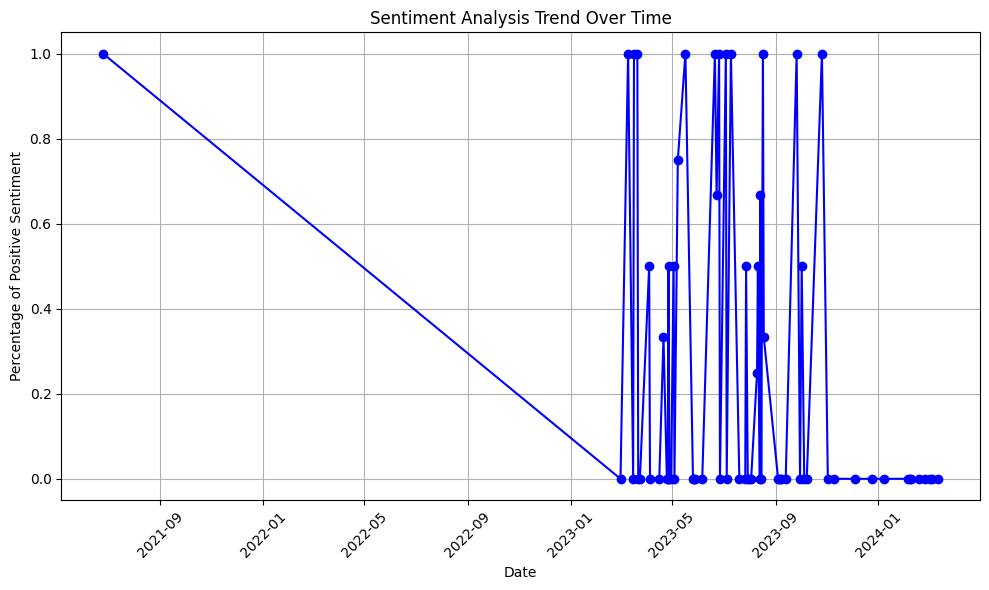

In [19]:
plt.figure(figsize=(10, 6))
sentiment_trend.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Sentiment Analysis Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Positive Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()